In [1]:
%reload_ext autoreload
%autoreload 2

from functools import partial
import joblib
import pickle
#from src.data import organize
from itertools import product # produto cartesiano de duas listas sem precisar de for aninhados
import pandas as pd # manipulação de dataframes
import nltk # ferramentas p/ processamento de linguagem natural
import numpy as np # manipulação de matrizes, funções matemáticas
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    ShuffleSplit, KFold, cross_validate, RandomizedSearchCV
)
from sklearn.metrics import confusion_matrix
nltk.download("stopwords")

from src.data import preprocessing

[nltk_data] Downloading package stopwords to /home/tayna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tayna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Adquire dados do arquivo produzido na etapa anterior
input_path = '../data/processed/textos_pre-processados.csv'
df = pd.read_csv(input_path)

# Converte as colunas com texto em uma lista
corpus = df.text.to_list()

# Atribui codificação dos rótulos das notícias
labels = df.label.replace({"true": 1, "fake": 0})

#import joblib
approach = joblib.load('../models/best_model.joblib')

In [3]:
approach

Pipeline(steps=[('vectorizer',
                 Pipeline(steps=[('count', CountVectorizer(max_features=2000)),
                                 ('tfidf', TfidfTransformer())])),
                ('pca', TruncatedSVD(n_components=200)),
                ('normalize', StandardScaler()),
                ('model',
                 SVC(C=100, gamma='auto', max_iter=10000, probability=True))])

In [4]:
df

,text,label,lemmatization_plus_stop_words,stemming_plus_stopwords,lemmatization_wo_stopwords,stemming_wo_stopwords
0,JBS pagará R$ 650 mil de indenização por demis...,true,jbs pagar r 650 mil de indenização por demissã...,jb pag r 650 mil de inden por demiss em mass e...,jbs pagar r 650 mil indenização demissão masso...,jb pag r 650 mil inden demiss mass mt jb don m...
1,Motorista envolvido em morte de comissário já ...,true,motorista envolver em morte de comissário já p...,motor envolv em mort de comiss já process pref...,motorista envolver morte comissário processar ...,motor envolv mort comiss process prefeit dem s...
2,Em propaganda partidária veiculada anteontem ...,true,em propaganda partidário veicular anteontem em...,em propagand partidár veicul anteont na televi...,propaganda partidário veicular anteontem telev...,propagand partidár veicul anteont televis rádi...
3,PGR pede ao STF que reverta decisão do Legisla...,true,pgr pedir a o stf que revertir decisão de o le...,pgr ped ao stf que revert decis do legisl poti...,pgr pedir stf reverto decisão legislativo poti...,pgr ped stf revert decis legisl potigu af depu...
4,Como o Ocidente compreende mal a China. Apesar...,true,como o ocidente compreender mal o China apesar...,com o ocid compreend mal a chin apes da apost ...,ocidente compreender mal China apesar aposta l...,ocid compreend mal chin apes apost líd ocident...
...,...,...,...,...,...,...
7195,Coreia anuncia novo teste nuclear. Diplomata d...,fake,coreiar anunciar novo teste nuclear diplomata ...,core anunc nov test nucle diplomat diz par was...,coreiar anunciar novo teste nuclear diplomata ...,core anunc nov test nucle diplomat diz washing...
7196,Temer vai punir Sergio Reis e Tiririca por tra...,fake,temer ir punir sergio rei e tiririco por traiç...,tem vai pun sergi reil e tirir por tra sergi r...,temer ir punir sergio reis tiririco traição Se...,tem vai pun sergi reil tirir tra sergi reil ti...
7197,Wikileaks diz que Temer era espião dos EUA. . ...,fake,Wikileaks dizer que temer ser espião de o EUA ...,wikileak diz que tem era espiã do eua o wikile...,Wikileaks dizer temer espião EUA Wikileaks por...,wikileak diz tem espiã eua wikileak port espec...
7198,Site divulga que viagem de Lula à Europa seria...,fake,site divulgar que viagem de Lula a o Europa se...,sit divulg que viag de lul à europ ser par tra...,site divulgar viagem Lula Europa tratamento po...,sit divulg viag lul europ trat possível cânc a...


In [24]:
y_probs = approach.predict_proba(df.lemmatization_plus_stop_words)

In [25]:
y_hat = approach.predict(df.lemmatization_plus_stop_words)

In [26]:
confusion_matrix(labels, y_hat)

array([[3573,   27],
       [  68, 3532]])

In [27]:
y_probs

array([[6.13211735e-02, 9.38678827e-01],
       [5.20753708e-02, 9.47924629e-01],
       [6.50800806e-07, 9.99999349e-01],
       ...,
       [9.92163091e-01, 7.83690866e-03],
       [9.93390476e-01, 6.60952352e-03],
       [9.90569199e-01, 9.43080111e-03]])

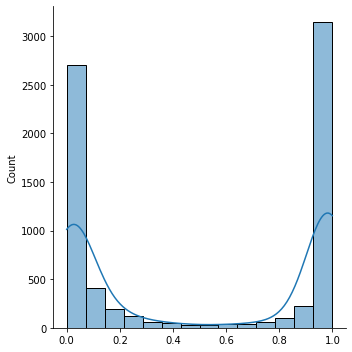

In [28]:
sns.displot(y_probs[:,0], kde=True)

In [21]:
df.lemmatization_wo_stopwords[(y_probs[:,0] > 0.05) & (y_probs[:,0] < 0.98)]

Series([], Name: lemmatization_wo_stopwords, dtype: object)